# Linear Regression from Scratch
This notebook implements Linear Regression from scratch in Python.

## Imports
Import required libraries.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import r2_score 

In [2]:
salaries = pd.read_csv('./data/salary_Data.csv')

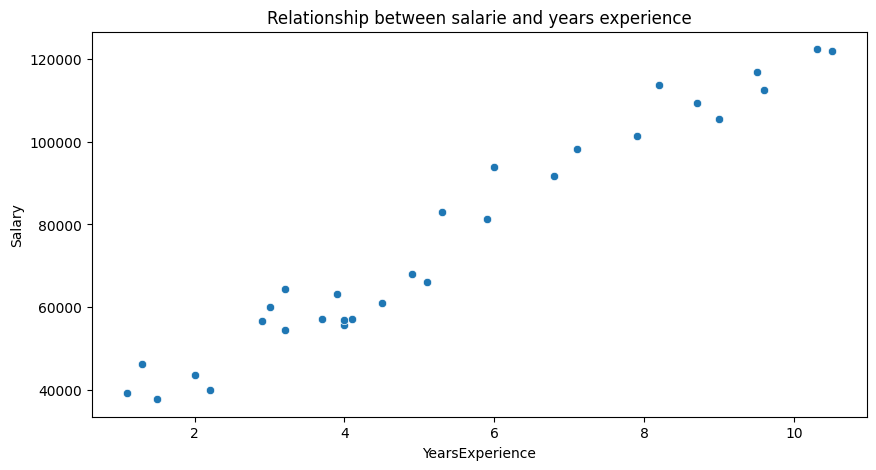

In [3]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=salaries['YearsExperience'],y=salaries['Salary'])
plt.title('Relationship between salarie and years experience')
plt.show()

In [4]:

def calculate_model(w,b,x):
    """
    calculate_model function.

    Parameters: w,b,x
    Returns: Output of the function.
    """
    return w*x+b

def mean_square_error(y,y_pred):
    """
    mean_square_error function.

    Parameters: y,y_pred
    Returns: Output of the function.
    """
    error = np.mean((y-y_pred)**2)
    return error

def gradient_decent(w_pred,b_pred,lr,x,y):
    """
    gradient_decent function.

    Parameters: w_pred,b_pred,lr,x,y
    Returns: Output of the function.
    """
    N = x.shape[0]
    
    dw = (-2/N)*np.sum(x*(y-(w_pred*x+b_pred)))
    db = (-2/N)*np.sum(y-(w_pred*x+b_pred))
    
    w = w_pred - lr*dw
    b = b_pred - lr*db
    
    return w,b

In [5]:

x = salaries['YearsExperience'].values
y = salaries['Salary'].values

np.random.seed(42)
w = np.random.randn(1)[0]
b = np.random.randn(1)[0]

lr = 0.0004
epochs = 40000
error = np.zeros((epochs,1))
print(error[:4]) 

[[0.]
 [0.]
 [0.]
 [0.]]


In [6]:
for i in range(epochs):
    w,b = gradient_decent(w,b,lr,x,y)
    
    y_pred = calculate_model(w,b,x)
    
    error[i] = mean_square_error(y,y_pred)
    
    if (i+1) % 1000 == 0:
        print(f'epoch: {i+1}, \n w: {w:.2f}, \n b: {b:.2f}, \n error: {error[i]}')

epoch: 1000, 
 w: 12440.01, 
 b: 5643.08, 
 error: [1.19037923e+08]
epoch: 2000, 
 w: 11974.49, 
 b: 8780.05, 
 error: [93836756.69291967]
epoch: 3000, 
 w: 11581.45, 
 b: 11428.64, 
 error: [75871783.97833452]
epoch: 4000, 
 w: 11249.61, 
 b: 13664.87, 
 error: [63065223.9907533]
epoch: 5000, 
 w: 10969.42, 
 b: 15552.95, 
 error: [53935904.32402413]
epoch: 6000, 
 w: 10732.86, 
 b: 17147.08, 
 error: [47427952.33237665]
epoch: 7000, 
 w: 10533.13, 
 b: 18493.02, 
 error: [42788675.72998791]
epoch: 8000, 
 w: 10364.49, 
 b: 19629.42, 
 error: [39481508.21844248]
epoch: 9000, 
 w: 10222.11, 
 b: 20588.89, 
 error: [37123951.66667558]
epoch: 10000, 
 w: 10101.90, 
 b: 21398.98, 
 error: [35443337.40224053]
epoch: 11000, 
 w: 10000.40, 
 b: 22082.95, 
 error: [34245290.08341551]
epoch: 12000, 
 w: 9914.70, 
 b: 22660.44, 
 error: [33391246.7681125]
epoch: 13000, 
 w: 9842.35, 
 b: 23148.02, 
 error: [32782431.09534832]
epoch: 14000, 
 w: 9781.26, 
 b: 23559.68, 
 error: [32348429.0760575

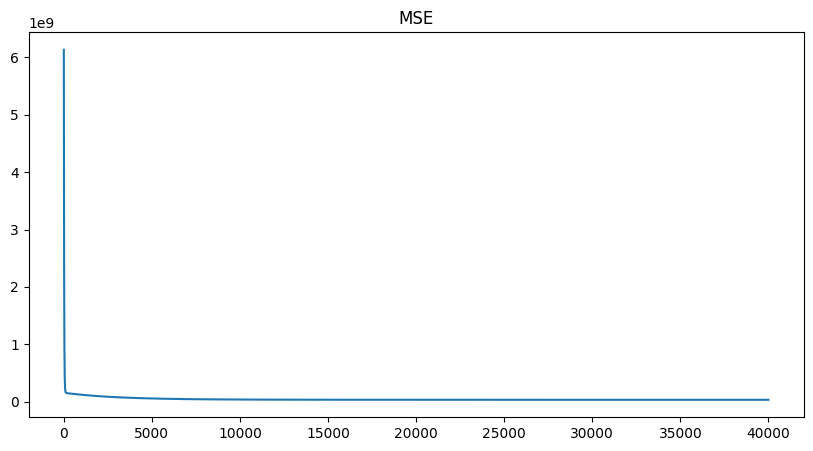

In [7]:
plt.figure(figsize=(10,5))
plt.plot(error)
plt.title('MSE')
plt.show()

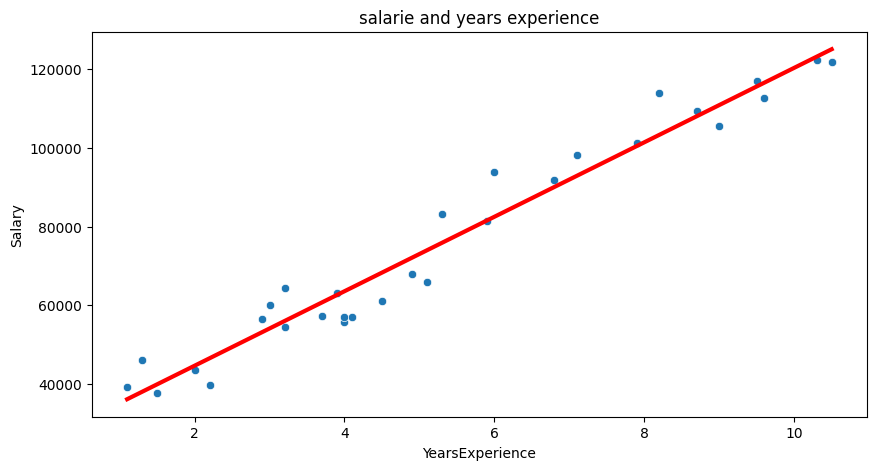

In [8]:
y_ = calculate_model(w,b,x)
plt.figure(figsize=(10,5))
sns.scatterplot(x=salaries['YearsExperience'],y=salaries['Salary'])
plt.plot(x,y_,'r',linewidth=3)
plt.title('salarie and years experience')
plt.show()

In [9]:
score = r2_score(y,y_)
print(f'acc: {score*100:.2f}%')

acc: 95.70%


In [10]:

years_experience = 10

prediction = calculate_model(w,b,years_experience)

print(f'A person with {years_experience} years experience should earn ${prediction:,.0f}k/year')

A person with 10 years experience should earn $120,305k/year
